In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#pd.set_option("display.max_rows", 999)
#pd.set_option("display.max_columns", 999)
#pd.reset_option("display.max_rows")
#pd.reset_option("display.max_columns")

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
# Data loading
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
# Lets look at 5 rows of train set
train.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Lets look at 5 rows of test set
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Target variable
y = train.pop("label")


In [6]:
# Lets look at 5 rows of the target variable
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [7]:
# Unique values and their frequiencies in the target variable
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
# train set has 784 feature(pixels) and 42000 photos, test set has 784 feature and 28000 photos.  
train.shape,y.shape,test.shape

((42000, 784), (42000,), (28000, 784))

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [11]:
y.dtype

dtype('int64')

In [12]:
# scale the input values to type float32

train = train.astype('float32')
test = test.astype('float32')
y = y.astype('float32')

In [13]:
# scale(normalize) the input values within the interval [0, 1]
train /= 255
test /= 255

In [14]:
# Converting pandas Dataframe to numpy array
"""
Keras models accept three types of inputs:

NumPy arrays, just like Scikit-Learn and many other Python-based libraries. This is a good option if your data fits in memory.

TensorFlow Dataset objects. This is a high-performance option that is more suitable for datasets that do not fit in memory and that are streamed from disk or from a distributed filesystem.

Python generators that yield batches of data (such as custom subclasses of the keras.utils.Sequence class).
"""
train = pd.DataFrame.to_numpy(train)
test = pd.DataFrame.to_numpy(test)

In [15]:
# alternative normalization method by using KERAS
"""
from tensorflow.keras.layers.experimental.preprocessing import Normalization

normalizer = Normalization(axis=-1)
normalizer.adapt(train)

train = normalizer(train)
test = normalizer(test)
print("var: %.4f" % np.var(train))
print("mean: %.4f" % np.mean(train))
print('*'*20)
print("var: %.4f" % np.var(test))
print("mean: %.4f" % np.mean(test))
"""



'\nfrom tensorflow.keras.layers.experimental.preprocessing import Normalization\n\nnormalizer = Normalization(axis=-1)\nnormalizer.adapt(train)\n\ntrain = normalizer(train)\ntest = normalizer(test)\nprint("var: %.4f" % np.var(train))\nprint("mean: %.4f" % np.mean(train))\nprint(\'*\'*20)\nprint("var: %.4f" % np.var(test))\nprint("mean: %.4f" % np.mean(test))\n'

In [16]:
# Splitting training set into train and dev set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

# Ann Model With KERAS

In [17]:
# Importing libraries
from keras.models import Sequential              # creates sequential model
from keras.layers.core import Dense, Activation # creates layers and calls activation functions

Using TensorFlow backend.


In [18]:
# Builing ANN model with KERAS Sequential
model = keras.Sequential([
    layers.Dense(64, activation = 'relu', name = 'layer1', input_shape = (X_train.shape[1],)), # layer with 2 nodes and activation function is RELU
    layers.Dense(64, activation = 'relu', name = 'layer2'),
    layers.Dense(10, activation = 'softmax', name = 'layer_pred')

])

In [19]:
# Shows layers of the model
model.layers

In [20]:
# Shows weights of the model (w,b)
model.weights

[<tf.Variable 'layer1/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.00914478, -0.02393217, -0.04820186, ..., -0.06129111,
         -0.02617295, -0.0027545 ],
        [ 0.07770083,  0.00158477,  0.02175289, ..., -0.03011573,
         -0.05035263,  0.06781081],
        [-0.05595437, -0.0127774 , -0.02544668, ...,  0.01271392,
         -0.01804495, -0.0018244 ],
        ...,
        [ 0.04507688, -0.02103567,  0.01450385, ..., -0.00880918,
         -0.04910123,  0.058993  ],
        [-0.04807988, -0.03342883, -0.04468384, ...,  0.03928694,
          0.0032797 ,  0.01679553],
        [ 0.02318372, -0.0395657 ,  0.04496364, ...,  0.03368635,
          0.04521949, -0.0711187 ]], dtype=float32)>,
 <tf.Variable 'layer1/bias:0' shape=(64,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [21]:
# Used to see the content of the model. It gives a summary of the model.
# Here is the total number of parameters entering the nodes in each layer, which is called params. 
# There is 784 inputs in the first layer,that is, 784 w and 2 b and since there are 2 nodes, the total parameter entered into the nodes = 2 * 784 +2 = 1570
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer_pred (Dense)           (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
# To add debugging mode to the model, we need to write "run_eagerly = True"  in the model loss and metrics
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [23]:
# Y variable has 10 different classes. Therefore we need to represent each values in y as vector. 
# This converst for example  1 to [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.] vector. 
"""
# label encoding to y variable
from keras.utils import to_categorical
y = to_categorical(y, num_classes=10)
"""
y_onehot = tf.one_hot(y, depth=10)
y_onehot_train = tf.one_hot(y_train, depth=10)
y_onehot_test = tf.one_hot(y_test, depth=10)

In [24]:
# model fitting
model.fit(train, y_onehot,
          batch_size=100, epochs=10)   # epochs = number of iterations

Epoch 1/10
420/420 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8912
Epoch 2/10
420/420 [==============================] - 1s 3ms/step - loss: 0.1779 - accuracy: 0.9475
Epoch 3/10
420/420 [==============================] - 1s 3ms/step - loss: 0.1324 - accuracy: 0.9606
Epoch 4/10
420/420 [==============================] - 1s 3ms/step - loss: 0.1065 - accuracy: 0.9672
Epoch 5/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0896 - accuracy: 0.9727
Epoch 6/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9771
Epoch 7/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9795
Epoch 8/10
420/420 [==============================] - 2s 4ms/step - loss: 0.0595 - accuracy: 0.9812
Epoch 9/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9837
Epoch 10/10
420/420 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9860

In [25]:
# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_onehot_test)


434/434 [==============================] - 1s 2ms/step - loss: 0.0372 - accuracy: 0.9874


# Confusion Matrix

In [26]:
# Plot confusion matrix 

# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

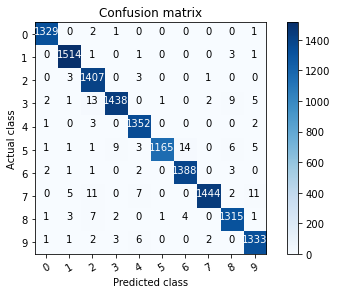

In [27]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_onehot_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# Prediction

## Prediction dev-set

In [28]:
# Predict () method returns a vector containing predictions for all data set items.
predictions = model.predict(X_test)

In [29]:
# We know which class gives the most probability of belonging with Numpy's argmax function, which returns the index of the position containing the highest value of the vector.
np.argmax(predictions[9])

1

In [30]:
# We can use sum to see that all values in a vector are zero. Because these are probability values.
np.sum(predictions[11])

1.0000002

## Prediction test-set

In [31]:
# Predict () method returns a vector containing predictions for all data set items.
test_result = model.predict(test)

In [32]:
# Saving the results into the csv file

# Convert one-hot vector to number
results = np.argmax(test_result,axis = 1) # this gives us the corresponding y value for the highest probability in the prediction vector e.g. 2 or 3


results = pd.Series(results,name="Label")


submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("test_submission.csv",index=False)